<a href="https://colab.research.google.com/github/ivomika/collab/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

train = pd.read_csv('/content/train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='count'>

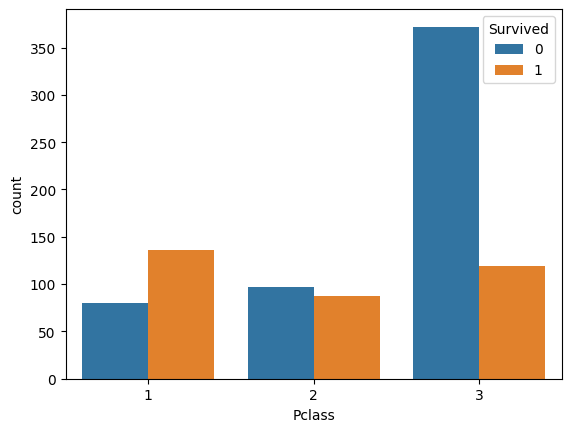

In [ ]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.drop(columns='Cabin', axis=1, inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
train.dropna(inplace=True)
train.isnull().sum()

<ipython-input-101-4bd6be00a069>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
pd.get_dummies(train['Sex']).head(10)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
5,False,True
6,False,True
7,False,True
8,True,False
9,True,False


In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [ ]:
embarket = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [ ]:
train = pd.concat([train,pclass, sex, embarket], axis=1)

In [ ]:
train.drop([
    'PassengerId',
    'Pclass',
    'Name',
    'Sex',
    'Ticket',
    'Embarked',
             ], axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,True,True,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['Age', 'Fare']
scaler.fit(train[cols_to_scale])

train[cols_to_scale] = scaler.transform(train[cols_to_scale])

train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,1,0.643971,1,0,0.788947,False,False,False,False,False
2,1,-0.281878,0,0,-0.486650,False,True,False,False,True
3,1,0.412509,1,0,0.422861,False,False,False,False,True
4,0,0.412509,0,0,-0.484133,False,True,True,False,True


In [ ]:
train.columns = train.columns.map(str)

In [ ]:
y_train = train['Survived']

x_train = train.drop('Survived', axis=1)

x_train.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,0.643971,1,0,0.788947,False,False,False,False,False
2,-0.281878,0,0,-0.486650,False,True,False,False,True
3,0.412509,1,0,0.422861,False,False,False,False,True
4,0.412509,0,0,-0.484133,False,True,True,False,True


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_pred_train)

conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Прогноз погиб','Прогноз Выжил'], index=['Факт Погиб', 'Факт Выжил'])
conf_matrix_df

,Прогноз погиб,Прогноз Выжил
Факт Погиб,479,70
Факт Выжил,103,237


In [ ]:
round((479+237)/(479+237+70+103), 3)

0.805

In [ ]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_train, y_pred_train)

round(model_accuracy, 3)

0.805

In [ ]:
test = pd.read_csv('/content/test.csv')
X_test = test
fillna_columns = {
    'Age': X_test['Age'].mean(),
    'Fare': X_test['Fare'].mean()
}
X_test.fillna(fillna_columns, inplace=True)
sex = pd.get_dummies(X_test['Sex'], drop_first=True)
embarked = pd.get_dummies(X_test['Embarked'], drop_first=True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first=True)

X_test = pd.concat([test, pclass, sex, embarked], axis = 1)
X_test.drop([
    'PassengerId',
    'Pclass',
    'Name',
    'Sex',
    'Cabin',
    'Ticket',
    'Embarked',
], axis=1, inplace=True)

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_test.columns = X_test.columns.map(str)
y_pred_test = model.predict(X_test)
y_pred_test[:10]



array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:

url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'
example = pd.read_csv(url)

example.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [ ]:
ids = test['PassengerId']
result = pd.DataFrame({'passengerId': ids, 'Survived': y_pred_test})

result.head()

result.to_csv('result.csv', index = False)
print('Файл сохранен!')

Файл сохранен!
